In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from tests.leandro.tools import *
from omegaconf import OmegaConf
from data._main import get_dataset
from tests.leandro.plots import *
import pandas as pd
%matplotlib inline

In [7]:
# Real data
config = OmegaConf.load("/home/lrvnc/projects/worm-graph/conf/dataset.yaml")
print("\nconfig:\n\t", OmegaConf.to_yaml(config), end="\n\n")
dataset = get_dataset(config)
oneWorm = dataset['worm0']
caData = oneWorm['smooth_calcium_data']


config:
	 dataset:
  name:
  - Kato2015


Chosen dataset(s): ['Kato2015']
Num. worms: 12



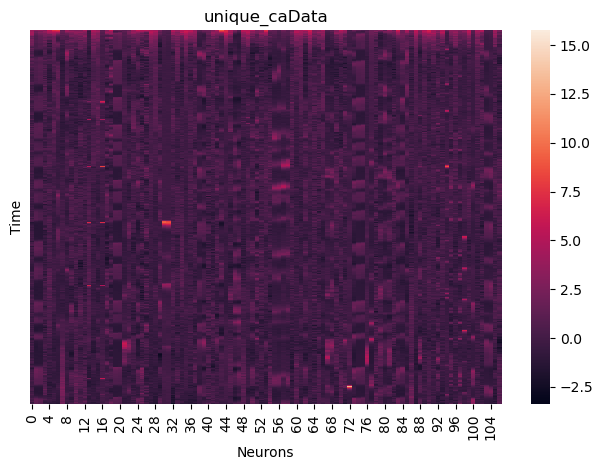

In [4]:
unique_idx = np.where(oneWorm['neurons_mask']==True)[0]
idx2unique = {pos: idx for pos, idx in enumerate(unique_idx)}
unique_caData= caData[:, oneWorm['neurons_mask']]
plotHeatmap(unique_caData, title="unique_caData", show_yticks=False, show_xticks=True, xlabel='Neurons', ylabel='Time')

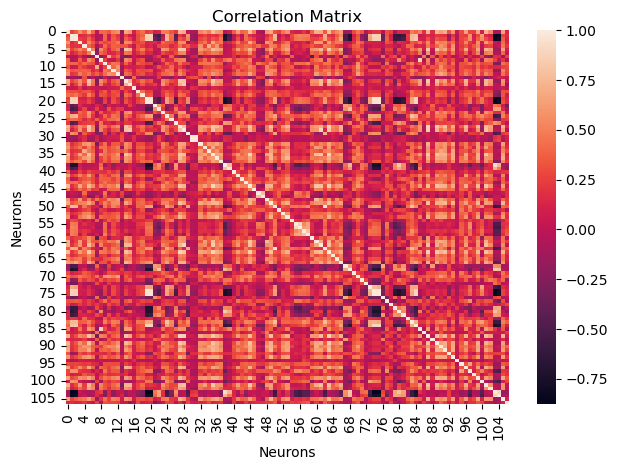

In [5]:
corr_matrix = correlation_matrix(unique_caData)
plotHeatmap(corr_matrix, title="Correlation Matrix", show_xticks=True, show_yticks=True, xlabel='Neurons', ylabel='Neurons')

In [6]:
high_corr = np.where(corr_matrix > 0.75)
low_corr = np.where(corr_matrix < -0.75)

hcorr, lcorr = [], []

for i in range(len(high_corr[0])):
    if high_corr[0][i] != high_corr[1][i]:
        hcorr.append([high_corr[0][i], high_corr[1][i]])

for i in range(len(low_corr[0])):
    if low_corr[0][i] != low_corr[1][i]:
        lcorr.append([low_corr[0][i], low_corr[1][i]])

hcorr = np.array(hcorr)
lcorr = np.array(lcorr)

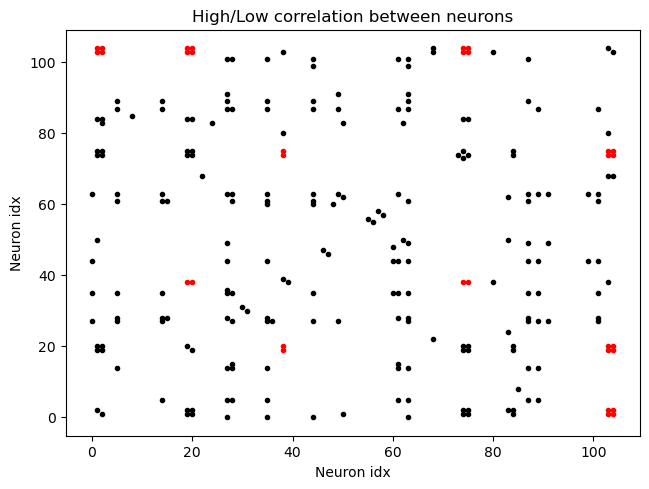

In [7]:
plt.plot(hcorr[:, 0], hcorr[:, 1], '.', color='black', label='High correlation')
plt.plot(lcorr[:, 0], lcorr[:, 1], '.', color='red', label='Low correlation')
#plt.legend()
plt.title("High/Low correlation between neurons")
plt.tight_layout()
plt.ylabel("Neuron idx")
plt.xlabel("Neuron idx")
plt.show()

Is it consistent for all worms?

In [8]:
def corr_oneWorm(oneWorm):

    caData = oneWorm['smooth_calcium_data']
    unique_idx = np.where(oneWorm['neurons_mask'] == True)[0]
    idx2unique = {pos: idx for pos, idx in enumerate(unique_idx)}
    unique_caData = caData[:, oneWorm['neurons_mask']]

    corr_matrix = correlation_matrix(unique_caData)

    high_corr = np.where(corr_matrix > 0.75)
    low_corr = np.where(corr_matrix < -0.75)

    hcorr, lcorr = [], []

    for i in range(len(high_corr[0])):
        if high_corr[0][i] != high_corr[1][i]:
            hcorr.append([high_corr[0][i], high_corr[1][i]])

    for i in range(len(low_corr[0])):
        if low_corr[0][i] != low_corr[1][i]:
            lcorr.append([low_corr[0][i], low_corr[1][i]])

    hcorr_unique = np.array(hcorr).copy()
    hcorr = np.apply_along_axis(lambda x: [unique_idx[x[0]], unique_idx[x[1]]], 1, hcorr_unique)
    lcorr_unique = np.array(lcorr).copy()
    lcorr = np.apply_along_axis(lambda x: [unique_idx[x[0]], unique_idx[x[1]]], 1, lcorr_unique)

    return {
        'coor_matrix': corr_matrix,
        'hcorr': hcorr,
        'hcorr_unique': hcorr_unique,
        'lcorr': lcorr,
        'lcorr_unique': lcorr_unique
    }

corr_data = {}

for wormID in dataset.keys():
    oneWorm = dataset[wormID]
    corr_data[wormID] = corr_oneWorm(oneWorm)

df = pd.DataFrame(corr_data)
df.head()

,worm0,worm1,worm2,worm3,worm4,worm5,worm6,worm7,worm8,worm9,worm10,worm11
coor_matrix,"[[0.9999999999999999, 0.25196189314291784, 0.3...","[[1.0, -0.16505154150707324, 0.440303566600309...","[[1.0, 0.07617813673082859, -0.120090895496523...","[[1.0, 0.42293539567290905, 0.7067039620778445...","[[1.0, 0.2909400163565006, 0.22803639540532195...","[[1.0, 0.5566483138640803, -0.0783319932597633...","[[1.0, -0.19173038343209964, -0.50087726036630...","[[1.0, 0.2837654820668311, 0.4273094511077461,...","[[1.0, 0.3954785347552443, 0.3836551824646395,...","[[0.9999999999999999, 0.26550347032410526, -0....","[[1.0, 0.3304277769924315, 0.30856840565497473...","[[1.0, 0.10478226874340286, 0.4871794523953454..."
hcorr,"[[10, 72], [10, 87], [10, 119], [10, 168], [12...","[[9, 262], [10, 252], [11, 150], [12, 13], [13...","[[12, 13], [12, 53], [12, 54], [12, 59], [12, ...","[[1, 98], [5, 232], [6, 87], [12, 13], [12, 53...","[[12, 13], [12, 54], [12, 199], [13, 12], [13,...","[[0, 52], [0, 124], [0, 171], [0, 184], [0, 19...","[[4, 225], [4, 270], [6, 12], [6, 13], [6, 53]...","[[3, 30], [3, 278], [12, 13], [12, 59], [12, 6...","[[2, 238], [2, 267], [11, 147], [11, 201], [12...","[[0, 153], [1, 9], [1, 22], [1, 65], [1, 253],...","[[12, 13], [12, 28], [12, 53], [12, 54], [12, ...","[[11, 224], [11, 275], [12, 13], [12, 53], [12..."
hcorr_unique,"[[0, 27], [0, 35], [0, 44], [0, 63], [1, 2], [...","[[5, 109], [6, 104], [7, 56], [8, 9], [9, 8], ...","[[4, 5], [4, 16], [4, 17], [4, 21], [4, 76], [...","[[1, 44], [2, 105], [3, 40], [5, 6], [5, 24], ...","[[5, 6], [5, 22], [5, 80], [6, 5], [6, 22], [6...","[[0, 25], [0, 55], [0, 77], [0, 82], [0, 94], ...","[[1, 103], [1, 132], [2, 5], [2, 6], [2, 19], ...","[[0, 8], [0, 102], [2, 3], [2, 20], [2, 21], [...","[[0, 105], [0, 120], [4, 62], [4, 86], [5, 6],...","[[0, 67], [1, 4], [1, 11], [1, 34], [1, 116], ...","[[3, 4], [3, 13], [3, 21], [3, 22], [3, 25], [...","[[5, 91], [5, 120], [6, 7], [6, 22], [6, 23], ..."
lcorr,"[[12, 272], [12, 275], [13, 272], [13, 275], [...","[[7, 10], [7, 252], [10, 7], [40, 262], [53, 2...","[[12, 216], [46, 112], [46, 170], [46, 230], [...","[[0, 40], [12, 275], [13, 213], [13, 214], [13...","[[3, 151], [31, 151], [31, 186], [53, 213], [5...","[[0, 33], [0, 115], [0, 188], [0, 229], [12, 2...","[[12, 56], [12, 136], [12, 189], [12, 213], [1...","[[12, 275], [13, 213], [13, 214], [13, 272], [...","[[12, 272], [13, 272], [35, 136], [52, 136], [...","[[1, 74], [1, 131], [1, 243], [12, 56], [12, 5...","[[12, 213], [12, 215], [13, 213], [13, 215], [...","[[12, 275], [13, 189], [13, 213], [13, 216], [..."
lcorr_unique,"[[1, 103], [1, 104], [2, 103], [2, 104], [19, ...","[[3, 6], [3, 104], [6, 3], [18, 109], [24, 85]...","[[4, 86], [14, 39], [14, 65], [14, 92], [14, 9...","[[0, 18], [5, 127], [6, 94], [6, 95], [6, 127]...","[[2, 59], [12, 59], [12, 71], [21, 86], [21, 8...","[[0, 17], [0, 50], [0, 86], [0, 116], [7, 107]...","[[5, 22], [5, 56], [5, 85], [5, 95], [5, 96], ...","[[2, 99], [3, 73], [3, 74], [3, 98], [3, 99], ...","[[5, 124], [6, 124], [16, 57], [21, 57], [21, ...","[[1, 39], [1, 58], [1, 109], [6, 27], [6, 28],...","[[3, 86], [3, 88], [4, 86], [4, 88], [10, 39],...","[[6, 120], [7, 67], [7, 84], [7, 87], [7, 120]..."


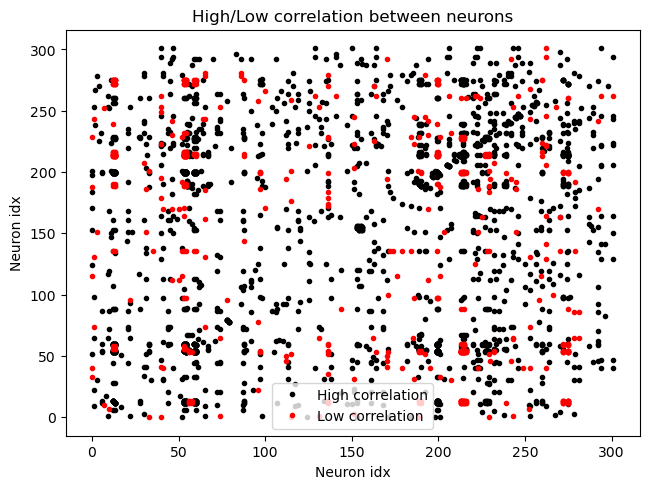

In [9]:
# plot all hcor and lcor points in same plot
hcorr = np.concatenate([corr_data[wormID]['hcorr'] for wormID in corr_data.keys()], axis=0)
lcorr = np.concatenate([corr_data[wormID]['lcorr'] for wormID in corr_data.keys()], axis=0)
plt.plot(hcorr[:, 0], hcorr[:, 1], '.', color='black', label='High correlation')
plt.plot(lcorr[:, 0], lcorr[:, 1], '.', color='red', label='Low correlation')
plt.legend()
plt.title("High/Low correlation between neurons")
plt.tight_layout()
plt.ylabel("Neuron idx")
plt.xlabel("Neuron idx")
plt.show()

In [10]:
# find the biggest value in hcorr and lcorr
hcorr = np.concatenate([corr_data[wormID]['hcorr_unique'] for wormID in corr_data.keys()], axis=0)
lcorr = np.concatenate([corr_data[wormID]['lcorr_unique'] for wormID in corr_data.keys()], axis=0)
np.max(hcorr), np.max(lcorr)

(144, 144)

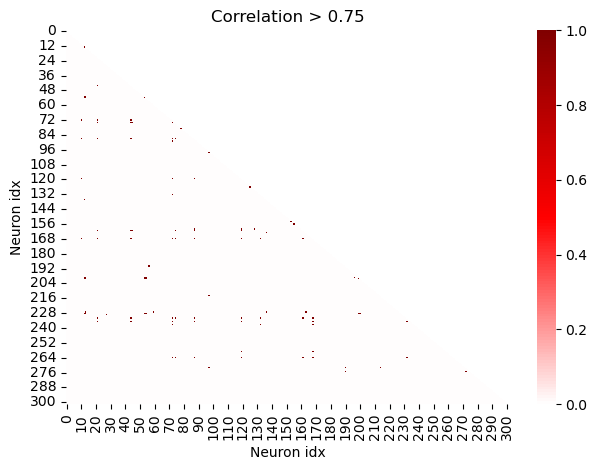

In [32]:
zero_matrix = np.zeros((302, 302))
h_matrix_sequence = []

for pos in [corr_data[wormID]['hcorr'] for wormID in corr_data.keys()]:
    zero_matrix[pos[:,0], pos[:,1]] += 1
    h_matrix_sequence.append(zero_matrix.copy())

dynamicHeatmap(h_matrix_sequence, title="Correlation > 0.75", cmap='seismic', center=0, mask='upper_t', show_xticks=True, show_yticks=True, xlabel='Neuron idx', ylabel='Neuron idx', filename='/home/lrvnc/projects/worm-graph/tests/leandro/data/hcorr.mp4')

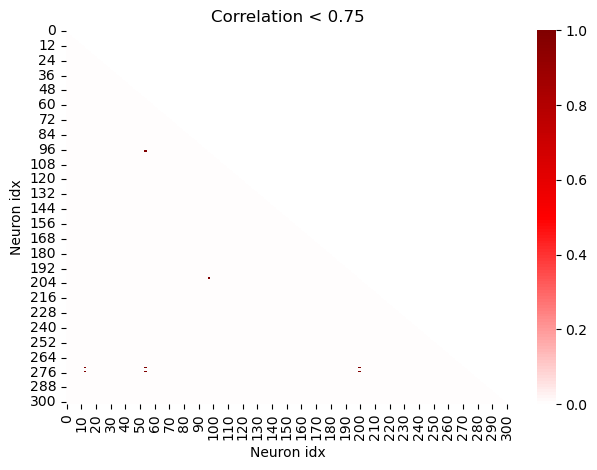

In [33]:
zero_matrix = np.zeros((302, 302))
l_matrix_sequence = []

for pos in [corr_data[wormID]['lcorr'] for wormID in corr_data.keys()]:
    zero_matrix[pos[:,0], pos[:,1]] += 1
    l_matrix_sequence.append(zero_matrix.copy())

dynamicHeatmap(l_matrix_sequence, title="Correlation < 0.75", cmap='seismic', center=0, mask='upper_t', show_xticks=True, show_yticks=True, xlabel='Neuron idx', ylabel='Neuron idx', filename='/home/lrvnc/projects/worm-graph/tests/leandro/data/lcorr.mp4')